In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_data = pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\ml project\cardio project\cardio_train.csv',sep=';')

In [3]:
df_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df_data.shape

(70000, 13)

In [5]:
df_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Observations

In [8]:
#Id column is no use hence we can drop that one
df_data.drop(columns='id',inplace=True)

In [9]:
#Here we can drop the duplicate data from the dataset
df_data.drop_duplicates(inplace=True)

In [10]:
df_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
df_data.shape

(69976, 12)

In [12]:
df_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
feature =['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio']
list(enumerate(feature))

[(0, 'age'),
 (1, 'gender'),
 (2, 'height'),
 (3, 'weight'),
 (4, 'ap_hi'),
 (5, 'ap_lo'),
 (6, 'cholesterol'),
 (7, 'gluc'),
 (8, 'smoke'),
 (9, 'alco'),
 (10, 'active'),
 (11, 'cardio')]

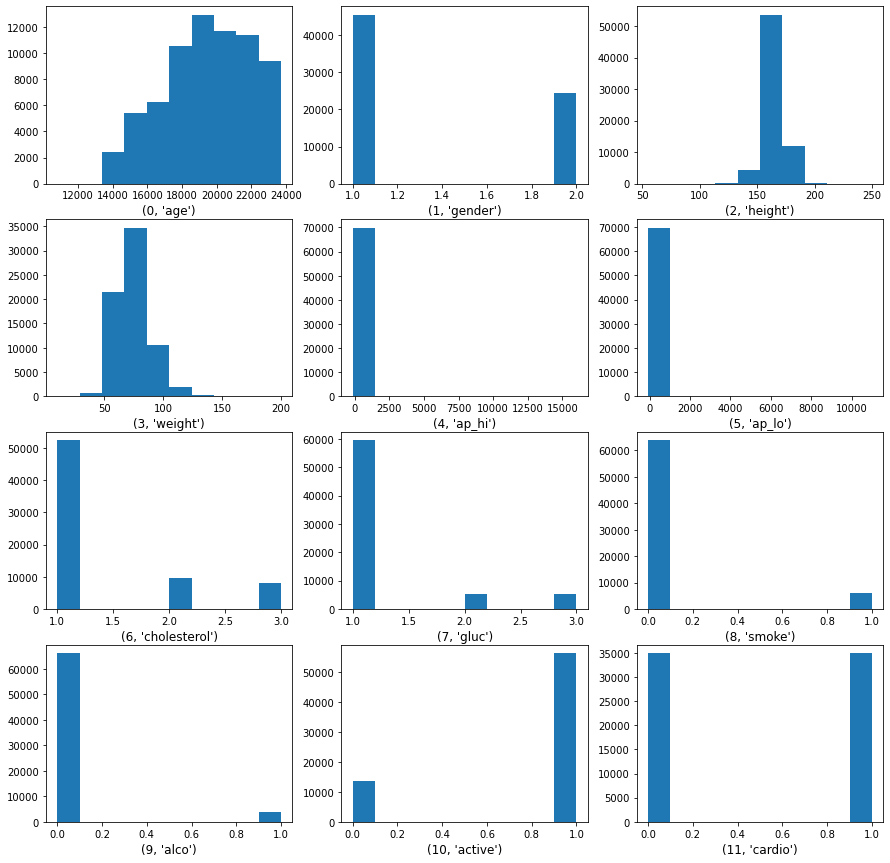

In [14]:
##Now we will check the distribution of the data set 
plt.figure(figsize=(15,15))
for i in enumerate(feature):
    plt.subplot(4,3,i[0]+1)
    plt.hist(i[1],data=df_data)
    plt.xlabel(i,fontsize=12)

In [15]:
# using z-score for minimize the skwness

from scipy.stats import zscore

In [16]:
z_score = zscore(df_data[['age','height','weight','ap_hi','ap_lo']])
abs_zscore = np.abs(z_score)
filtring_entry = (abs_zscore <3).all(axis=1) # abs= absolut number and 3 is for less then 3 standard devation
df_data = df_data[filtring_entry]
df_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000,68043.000000
mean,19466.951531,1.347339,164.372441,73.569152,126.173552,81.288053,1.362153,1.223609,0.087239,0.053187,0.803712,0.492938
std,2467.016002,0.476128,7.692655,13.202960,17.854738,10.235287,0.677132,0.569561,0.282187,0.224408,0.397192,0.499954
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


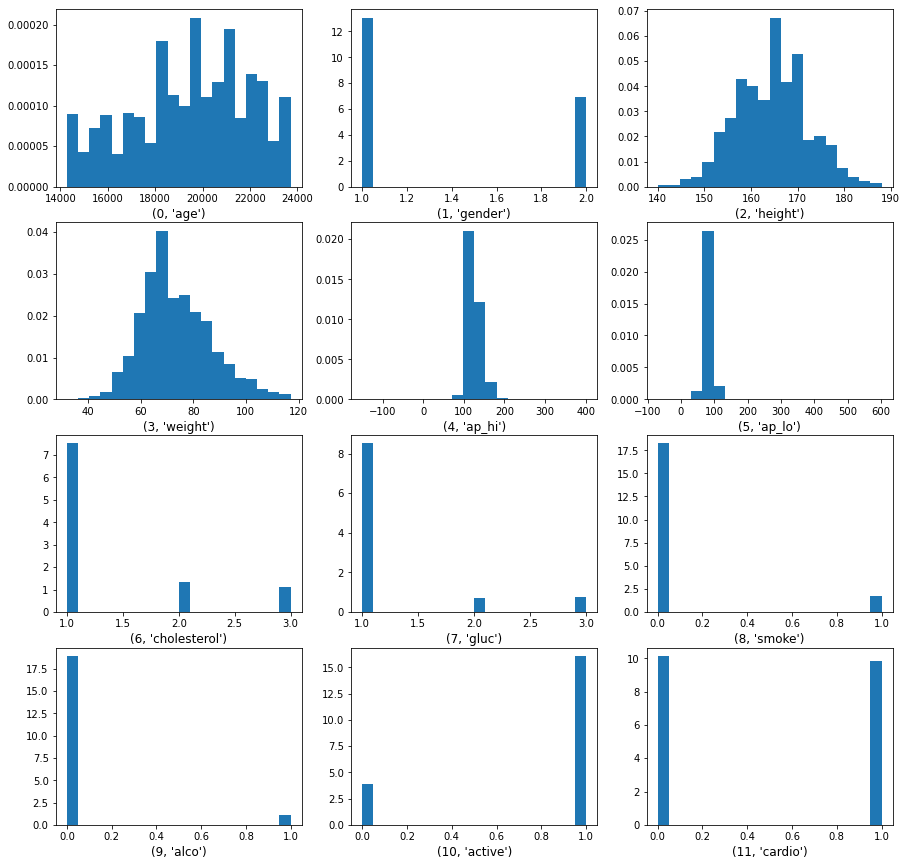

In [17]:
# we can see above skwness is minimized and now will check the distribution using visualization
plt.figure(figsize=(15,15))
for i in enumerate(feature):
    plt.subplot(4,3,i[0]+1)
    plt.hist(i[1],data=df_data,bins=20,density=True)
    plt.xlabel(i,fontsize=12)

In [18]:
df_age=df_data['age'] / 365

In [19]:
df_data['age'] = df_age

In [20]:
df_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler #### For normalize the data
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
#Divde the labels and features
X = df_data.drop(columns=['cardio'])
y = df_data['cardio']

print("Shape of X =>",X.shape)
print("Shape of y =>",y.shape)

Shape of X => (68043, 11)
Shape of y => (68043,)


In [23]:
scaler = StandardScaler()
X_scaler=scaler.fit_transform(X)

In [24]:
vif = pd.DataFrame()
vif['score'] = [variance_inflation_factor(X_scaler,i) for i in range (X_scaler.shape[1])]
vif['feature'] = X.columns
vif

,score,feature
0,1.071023,age
1,1.508324,gender
2,1.520919,height
3,1.222068,weight
4,1.658059,ap_hi
5,1.607518,ap_lo
6,1.317978,cholesterol
7,1.257675,gluc
8,1.249232,smoke
9,1.140165,alco


### As checked above the score of each columns is less then 5 so we can assume that there is not multicollinerity

# Model Building

In [25]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,random_state=111,test_size=0.25)

In [27]:
random_cls = RandomForestClassifier()

In [28]:
# Here we are checking parameter for better score
parameter = {'n_estimators':[15,17],
             'criterion':['entropy'],
             'max_depth':[10,15],'min_samples_split':[10,11],
             'min_samples_leaf':[5,6]}

grd_cv = GridSearchCV(random_cls,param_grid=parameter)
grd_cv.fit(X_train,y_train)
print("Best Parameters are ",grd_cv.best_params_)

Best Parameters are  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 17}


In [29]:
#here we are directly reinstatiating above parameters 
random_cls = grd_cv.best_estimator_

# Train the model

random_cls.fit(X_train,y_train)

# Prediction

y_pred = random_cls.predict(X_test)

# Confusion Matrix
rand_for_conf_mat = confusion_matrix(y_test,y_pred)
print("Confustion matrix",'\n',rand_for_conf_mat)
print("****************************")

print("accuracy score =",accuracy_score(y_test,y_pred))

Confustion matrix 
 [[6876 1798]
 [2714 5623]]
****************************
accuracy score = 0.7347598612662395


In [30]:
#classification report

report = classification_report(y_test,y_pred)

print(" classification_report" ,'\n',report)

 classification_report 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      8674
           1       0.76      0.67      0.71      8337

    accuracy                           0.73     17011
   macro avg       0.74      0.73      0.73     17011
weighted avg       0.74      0.73      0.73     17011



# Now lets choose best model using ROC and AUC curve

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#ROC AND AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [32]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

print("Model is created")

Model is created


In [33]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [34]:
lr.score(X_train,y_train)
knn.score(X_train,y_train)
dt.score(X_train,y_train)
rf.score(X_train,y_train)

print("Models scores")

Models scores


In [35]:
roc_auc_score(y_test,lr.predict(X_test))

0.7262945622809985

In [36]:
roc_auc_score(y_test,knn.predict(X_test))

0.6955386505658054

In [37]:
roc_auc_score(y_test,dt.predict(X_test))

0.6360704725475322

In [38]:
roc_auc_score(y_test,rf.predict(X_test))

0.7167242216975372

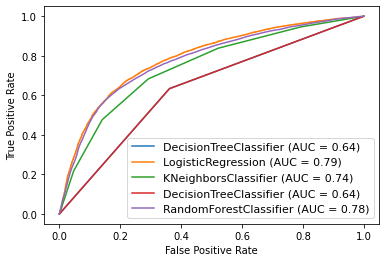

In [42]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')


# Here we can check best fitted model is Logistic Regression and it is giving the score around = 79%